In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_validate ,KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_ind,ttest_rel


import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv("Sleep_Disorder_data.csv")

In [ ]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
data.shape

(374, 13)

In [ ]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
data['Sleep Disorder'] = data['Sleep Disorder'].replace({'Insomnia': 0, 'Sleep Apnea': 1})

In [ ]:
data.loc[data['Sleep Disorder'].isna(), 'Sleep Disorder'] = 2

In [ ]:
print("Sleep Disorder Mapping:")
print("0 -> Insomnia")
print("1 -> Sleep Apnea")
print("2 -> None of the diseases")


data

Sleep Disorder Mapping:
0 -> Insomnia
1 -> Sleep Apnea
2 -> None of the diseases


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,2.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,2.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,2.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1.0
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,1.0
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1.0
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1.0


In [ ]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
data=data.drop('Person ID',axis=1)

In [ ]:
data.nunique()

,0
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,4
Blood Pressure,25
Heart Rate,19


In [ ]:
data['Systolic BP'] = data['Blood Pressure'].str.split('/').str[0].astype(int)
data['Diastolic BP'] = data['Blood Pressure'].str.split('/').str[1].astype(int)
data=data.drop(['Blood Pressure'], axis=1)

In [ ]:
data.head(4)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,2.0,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,2.0,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,2.0,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1.0,140,90


In [ ]:
import plotly.graph_objects as go
counts = data['Gender'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Gender Pie Chart Depiction')
fig.show()

In [ ]:
sleep_disorder_counts = data['Sleep Disorder'].value_counts()
labels = ['Insomnia', 'Sleep Apnea', 'None']  # Use descriptive labels
fig = go.Figure(data=[go.Pie(labels=labels, values=sleep_disorder_counts)])
fig.update_layout(title='Sleep Disorder Distribution')
fig.show()


In [ ]:
fig = go.Figure(data=[go.Bar(x=data['Occupation'].value_counts().index, y=data['Occupation'].value_counts())])
fig.update_layout(
 title= 'Occupation',
 xaxis_title="Occupation",
 yaxis_title="Count"
 )
fig.show()

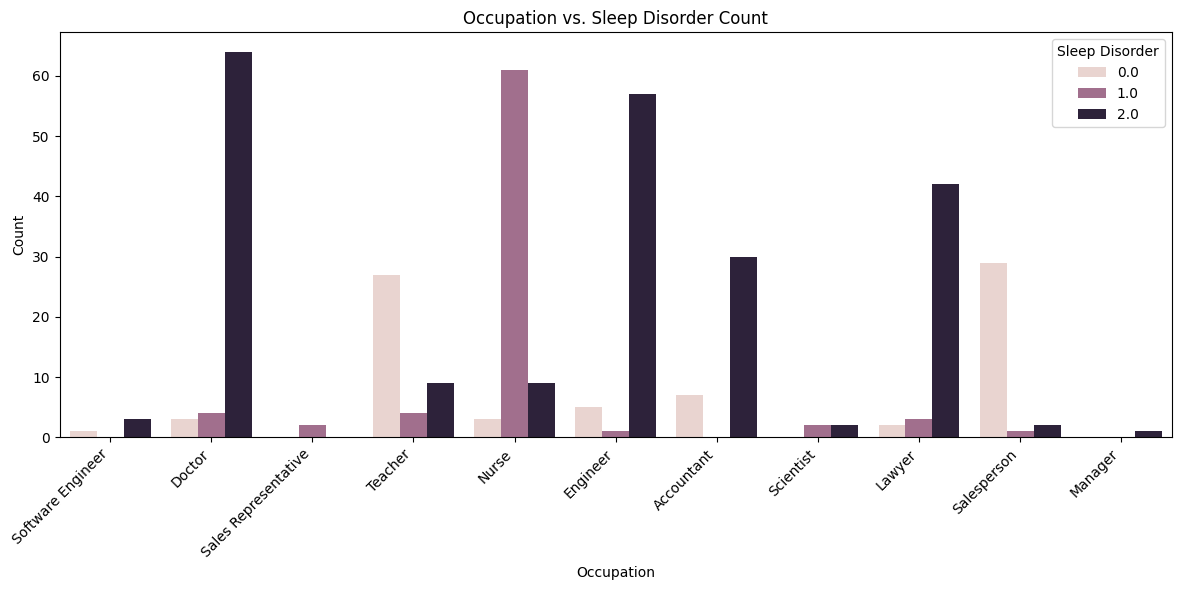

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Sleep Disorder', data=data)
plt.title('Occupation vs. Sleep Disorder Count')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


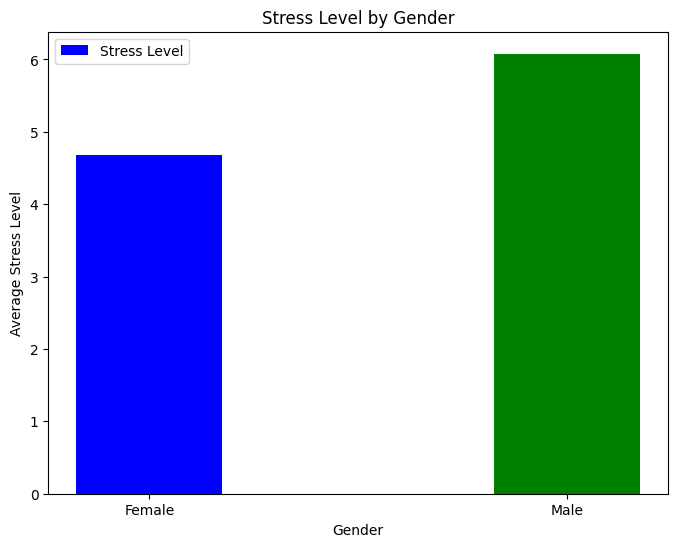

In [ ]:
gender_stress = data.groupby('Gender')['Stress Level'].mean()
x = np.arange(len(gender_stress))
width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(x, gender_stress, width, label='Stress Level', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Average Stress Level')
plt.title('Stress Level by Gender')
plt.xticks(x, gender_stress.index)
plt.legend()
plt.show()

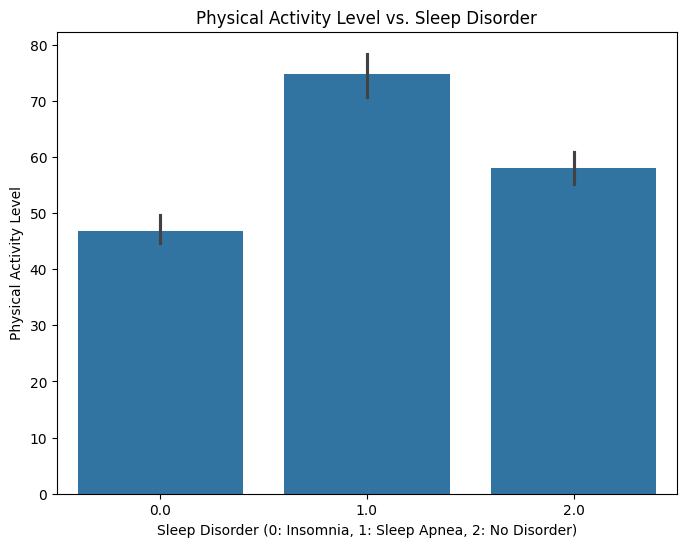

Key takeaways:
- People with sleep disorder 0 have an average Physical Activity Level of 46.82.
- People with sleep disorder 1 have an average Physical Activity Level of 74.79.
- People with sleep disorder 2 have an average Physical Activity Level of 57.95.
----------------------------------------------------------------------------------------------------


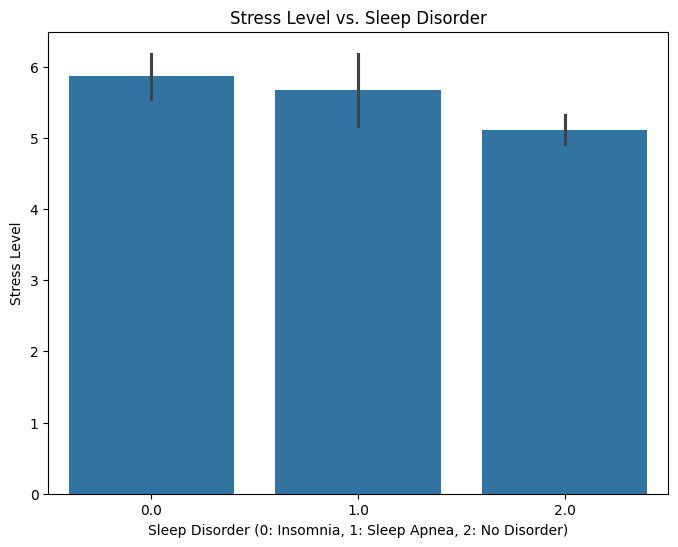

Key takeaways:
- People with sleep disorder 0 have an average Stress Level of 5.87.
- People with sleep disorder 1 have an average Stress Level of 5.67.
- People with sleep disorder 2 have an average Stress Level of 5.11.
----------------------------------------------------------------------------------------------------


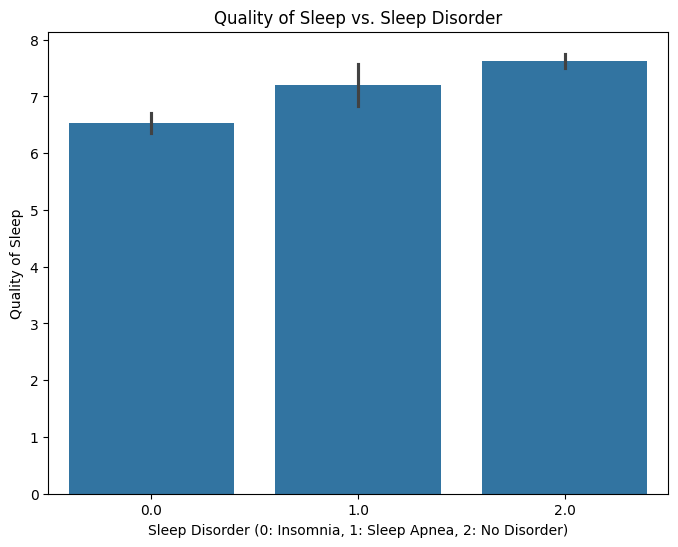

Key takeaways:
- People with sleep disorder 0 have an average Quality of Sleep of 6.53.
- People with sleep disorder 1 have an average Quality of Sleep of 7.21.
- People with sleep disorder 2 have an average Quality of Sleep of 7.63.
----------------------------------------------------------------------------------------------------


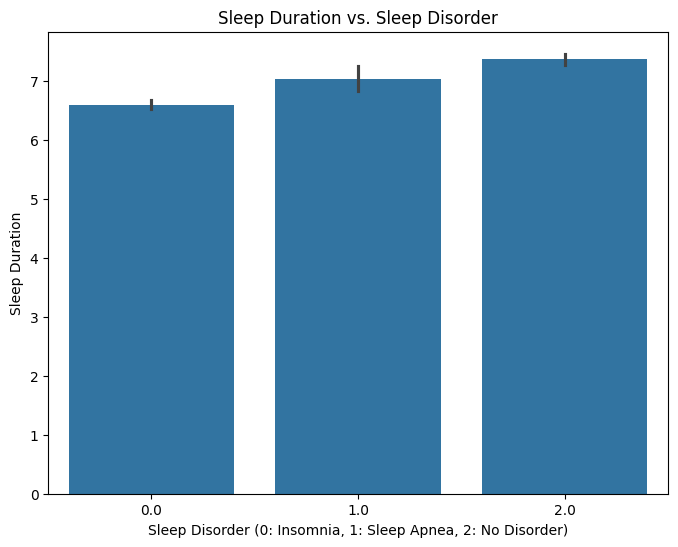

Key takeaways:
- People with sleep disorder 0 have an average Sleep Duration of 6.59.
- People with sleep disorder 1 have an average Sleep Duration of 7.03.
- People with sleep disorder 2 have an average Sleep Duration of 7.36.
----------------------------------------------------------------------------------------------------


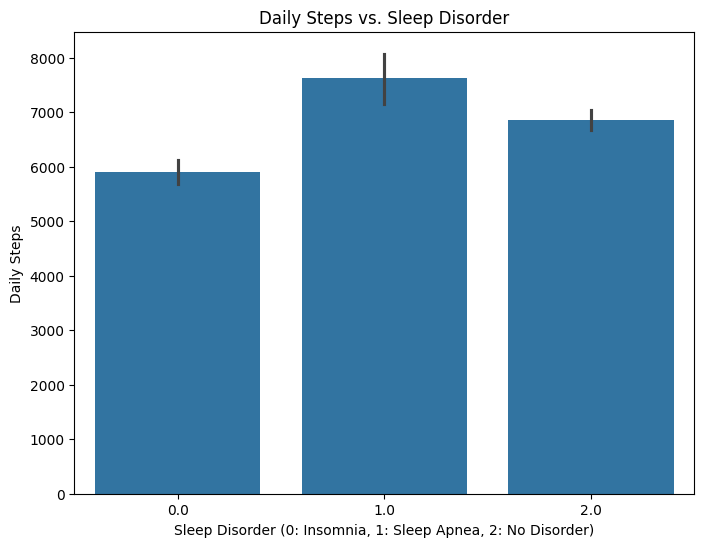

Key takeaways:
- People with sleep disorder 0 have an average Daily Steps of 5901.30.
- People with sleep disorder 1 have an average Daily Steps of 7619.23.
- People with sleep disorder 2 have an average Daily Steps of 6852.97.
----------------------------------------------------------------------------------------------------


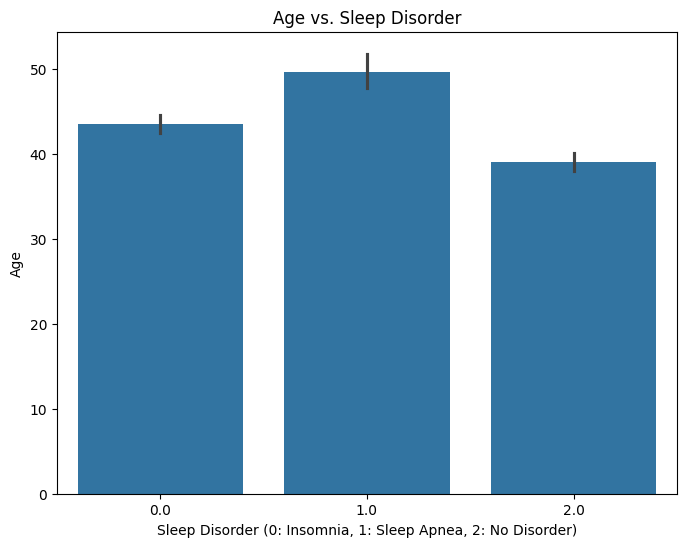

Key takeaways:
- People with sleep disorder 0 have an average Age of 43.52.
- People with sleep disorder 1 have an average Age of 49.71.
- People with sleep disorder 2 have an average Age of 39.04.
----------------------------------------------------------------------------------------------------


In [ ]:
def plot_sleep_disorder_impact(data, feature):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Sleep Disorder', y=feature, data=data)
    plt.title(f'{feature} vs. Sleep Disorder')
    plt.xlabel('Sleep Disorder (0: Insomnia, 1: Sleep Apnea, 2: No Disorder)')
    plt.ylabel(feature)
    plt.show()


    disorder_groups = data.groupby('Sleep Disorder')[feature].mean()
    print("Key takeaways:")
    for disorder, avg_value in disorder_groups.items():
        print(f"- People with sleep disorder {int(disorder)} have an average {feature} of {avg_value:.2f}.")
    print("-" * 100)


features = ['Physical Activity Level', 'Stress Level', 'Quality of Sleep','Sleep Duration', 'Daily Steps', 'Age']

for feature in features:
    plot_sleep_disorder_impact(data, feature)


In [ ]:
from sklearn.preprocessing import LabelEncoder

def print_label_mapping(column_name):
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"Label Mapping for {column_name}:")
    for key, value in mapping.items():
        print(f"  {value} -> {key}")
    print("-" * 40)


encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
print_label_mapping("Gender")

encoder = LabelEncoder()
data['Occupation'] = encoder.fit_transform(data['Occupation'])
print_label_mapping("Occupation")


encoder = LabelEncoder()
data['BMI Category'] = encoder.fit_transform(data['BMI Category'])
print_label_mapping("BMI Category")


Label Mapping for Gender:
  0 -> Female
  1 -> Male
----------------------------------------
Label Mapping for Occupation:
  0 -> Accountant
  1 -> Doctor
  2 -> Engineer
  3 -> Lawyer
  4 -> Manager
  5 -> Nurse
  6 -> Sales Representative
  7 -> Salesperson
  8 -> Scientist
  9 -> Software Engineer
  10 -> Teacher
----------------------------------------
Label Mapping for BMI Category:
  0 -> Normal
  1 -> Normal Weight
  2 -> Obese
  3 -> Overweight
----------------------------------------


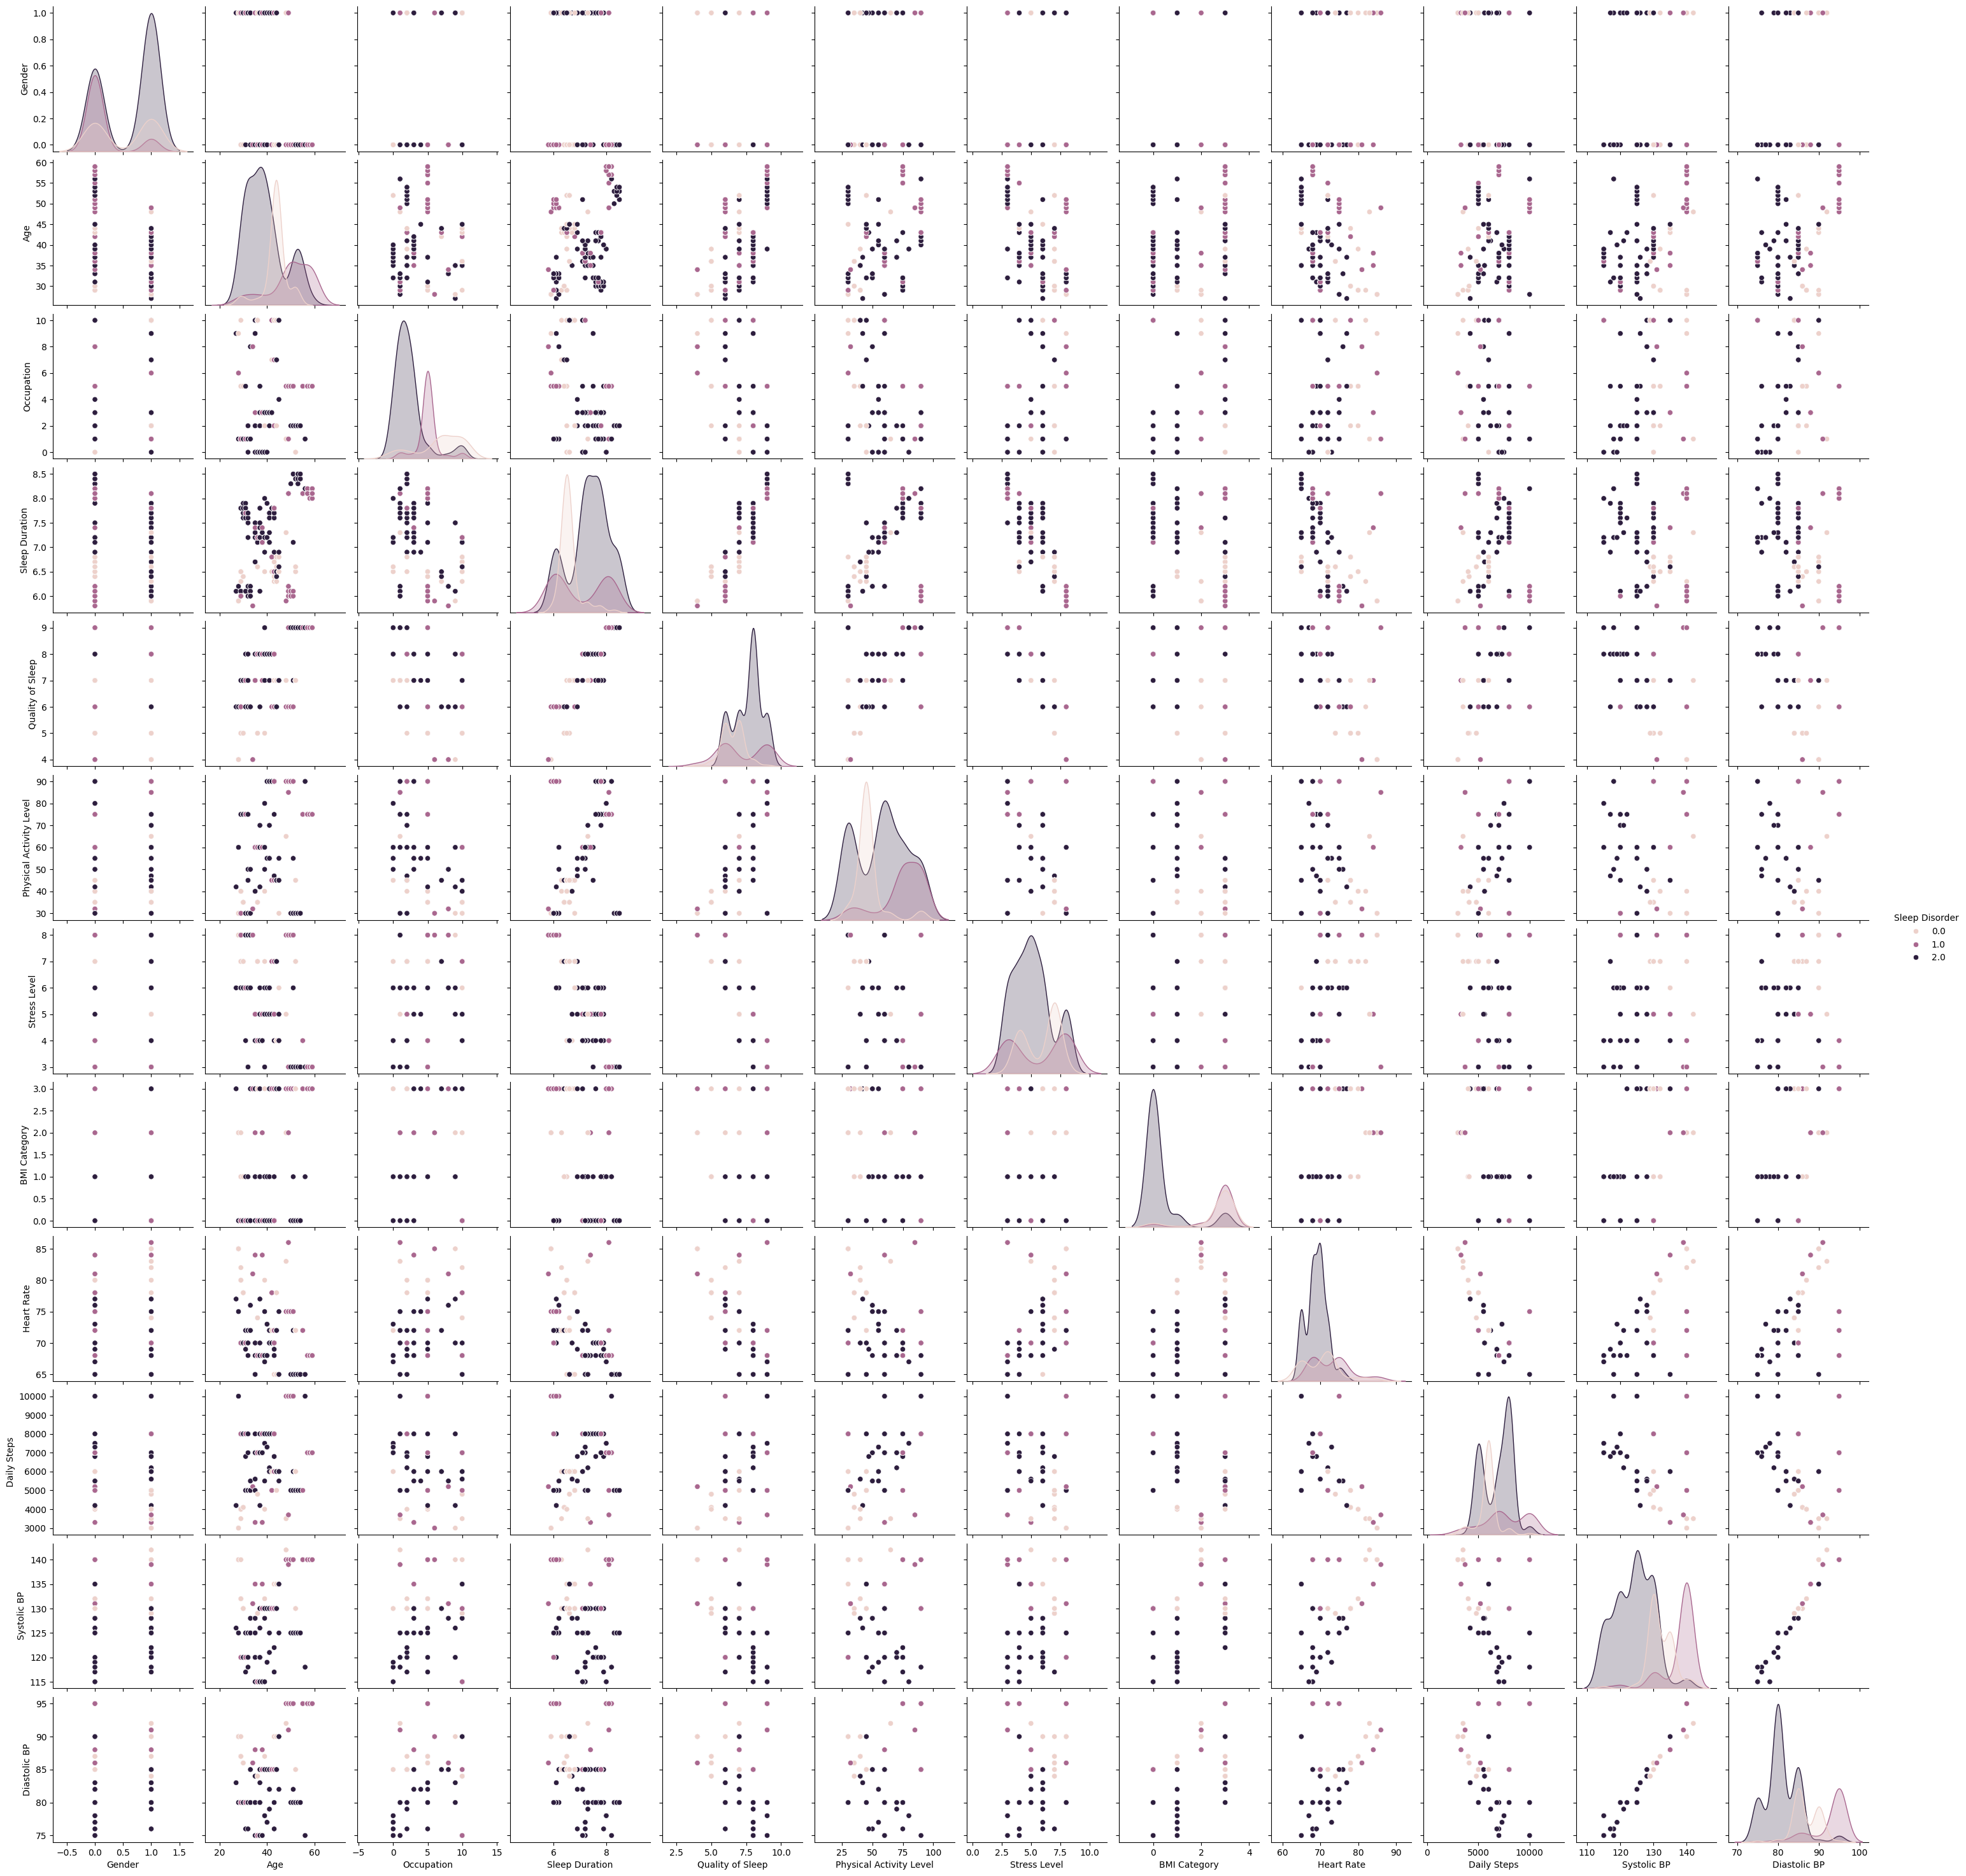

In [ ]:
sns.pairplot(data,hue ='Sleep Disorder')

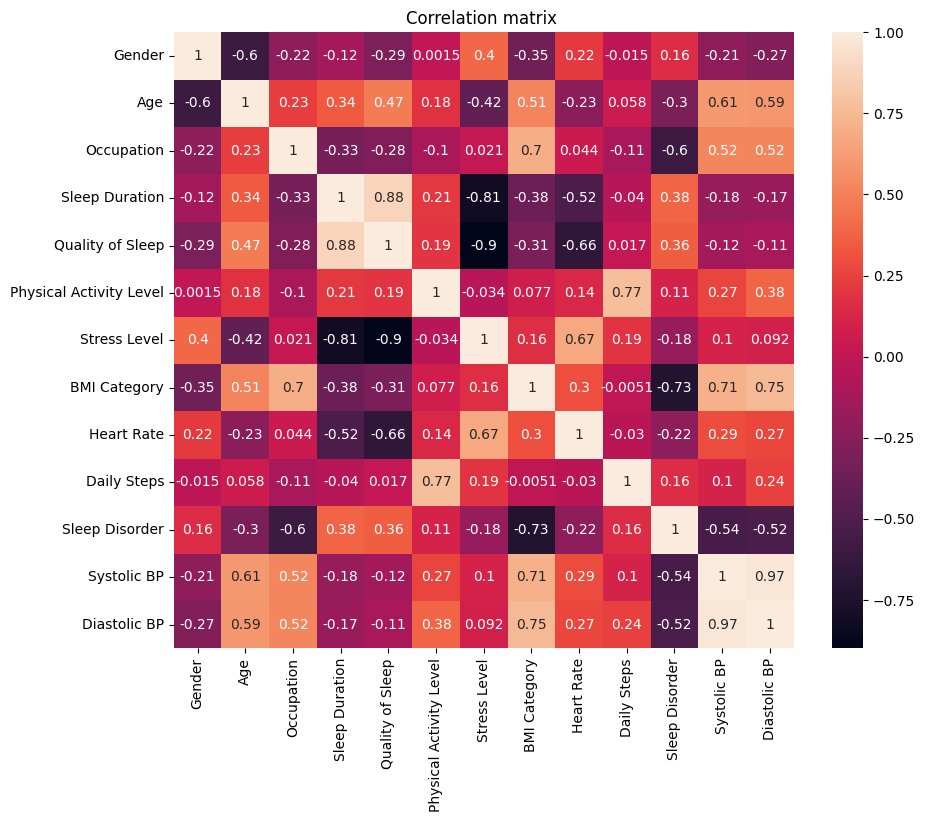

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation matrix ')
plt.show()

In [ ]:
x = data.drop(columns=['Sleep Disorder'])
y = data['Sleep Disorder']

In [ ]:
x.shape

(374, 12)

In [ ]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

cv_results = {}

for name, model in models.items():
    scores = cross_validate(model, x, y, cv=skf, scoring=scoring)
    cv_results[name] = {
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1 Score': scores['test_f1'].mean()
    }


print("\nK-Fold Cross-Validation Results:")
for model, scores in cv_results.items():
    print(f"\n{model}:")
    for metric, value in scores.items():
        print(f"  {metric} = {value:.4f}")


K-Fold Cross-Validation Results:

KNN:
  Accuracy = 0.8583
  Precision = 0.8590
  Recall = 0.8583
  F1 Score = 0.8576

SVM:
  Accuracy = 0.6551
  Precision = 0.6289
  Recall = 0.6551
  F1 Score = 0.5737

Decision Tree:
  Accuracy = 0.8905
  Precision = 0.8949
  Recall = 0.8905
  F1 Score = 0.8908

Random Forest:
  Accuracy = 0.9171
  Precision = 0.9175
  Recall = 0.9171
  F1 Score = 0.9165


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
y = y
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    mlp = MLPClassifier(hidden_layer_sizes=(32,16, 8),max_iter=120, activation='relu',solver='adam', random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))


print("\n ANN 5-Fold Cross-Validation:")
print(f"Accuracy : {np.mean(acc_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall   : {np.mean(recall_scores):.4f}")
print(f"F1 Score : {np.mean(f1_scores):.4f}")


 ANN 5-Fold Cross-Validation:
Accuracy : 0.9117
Precision: 0.9130
Recall   : 0.9117
F1 Score : 0.9112


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
y_pred_knn_nor = KNN.predict(x_test)


KNN Results for Testing Phase :
Accuracy: 0.8850
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79        24
         1.0       0.95      0.70      0.81        27
         2.0       0.94      0.97      0.95        62

    accuracy                           0.88       113
   macro avg       0.87      0.85      0.85       113
weighted avg       0.90      0.88      0.88       113

F1 Score: 0.8840
#################################


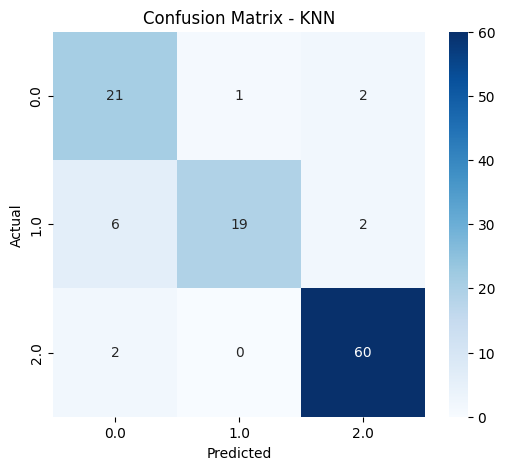

In [ ]:
print("\nKNN Results for Testing Phase :")
Acc_score_knn_nor = accuracy_score(y_test, y_pred_knn_nor)
print(f"Accuracy: {Acc_score_knn_nor:.4f}")
print ("#################################")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn_nor))
F1_knn_nor = f1_score(y_test, y_pred_knn_nor, average='weighted')
print(f"F1 Score: {F1_knn_nor:.4f}")
print ("#################################")


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_nor), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

In [ ]:
print(" KNN Result for Training Phase ")
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
y_pred_knn_trnor = KNN.predict(x_train)
Acc_knn_trnor = accuracy_score(y_train, y_pred_knn_trnor)

print(f"Accuracy: {Acc_knn_trnor:.4f}")
print ("#################################")
print("Classification Report:")
print(classification_report(y_train, y_pred_knn_trnor))
F1_knn_trnor = f1_score(y_train, y_pred_knn_trnor, average='weighted')
print(f"F1 Score: {F1_knn_trnor:.4f}")
print ("#################################")


 KNN Result for Training Phase 
Accuracy: 0.9004
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        53
         1.0       0.83      0.84      0.83        51
         2.0       0.94      0.93      0.93       157

    accuracy                           0.90       261
   macro avg       0.88      0.88      0.88       261
weighted avg       0.90      0.90      0.90       261

F1 Score: 0.9006
#################################



SVM Results for Testing Phase :
Accuracy: 0.6637
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.70      0.35      0.47        20
         2.0       0.67      0.96      0.79        71

    accuracy                           0.66       113
   macro avg       0.46      0.44      0.42       113
weighted avg       0.54      0.66      0.58       113

F1 Score: 0.5765
#################################


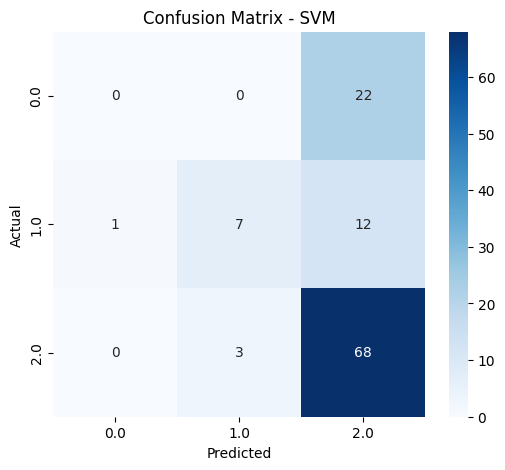

In [ ]:
#SVM
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm_nor = svm.predict(x_test)


print("\nSVM Results for Testing Phase :")
Acc_score_svm_nor = accuracy_score(y_test, y_pred_svm_nor)
print(f"Accuracy: {Acc_score_svm_nor:.4f}")
print ("#################################")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm_nor))
F1_svm_nor = f1_score(y_test, y_pred_svm_nor, average='weighted')
print(f"F1 Score: {F1_svm_nor:.4f}")
print ("#################################")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_nor), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


In [ ]:
print("SVM Results  for Training Phase ")
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm_trnor = svm.predict(x_train)


print("\nSVM Results:")
Acc_score_svm_trnor = accuracy_score(y_train, y_pred_svm_trnor)
print(f"Accuracy: {Acc_score_svm_trnor:.4f}")
print ("#################################")
print("Classification Report:")
print(classification_report(y_train, y_pred_svm_trnor))
F1_svm_trnor = f1_score(y_train, y_pred_svm_trnor, average='weighted')
print(f"F1 Score: {F1_svm_trnor:.4f}")

SVM Results  for Training Phase 

SVM Results:
Accuracy: 0.6437
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.25      0.02      0.03        55
         1.0       0.85      0.38      0.52        58
         2.0       0.63      0.98      0.77       148

    accuracy                           0.64       261
   macro avg       0.57      0.46      0.44       261
weighted avg       0.60      0.64      0.56       261

F1 Score: 0.5574



Decision Tree results for testing phase:
Accuracy: 0.8673
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78        24
         1.0       0.84      0.78      0.81        27
         2.0       0.93      0.92      0.93        62

    accuracy                           0.87       113
   macro avg       0.84      0.84      0.84       113
weighted avg       0.87      0.87      0.87       113

F1 Score: 0.8681
#################################


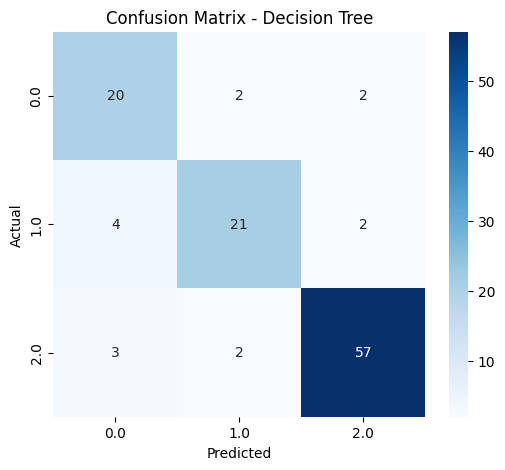

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt_nor = dt.predict(x_test)

print("\nDecision Tree results for testing phase:")
Acc_score_dt_nor = accuracy_score(y_test, y_pred_dt_nor)
print(f"Accuracy: {Acc_score_dt_nor:.4f}")
print ("#################################")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_nor))
F1_dt_nor = f1_score(y_test, y_pred_dt_nor, average='weighted')
print(f"F1 Score: {F1_dt_nor:.4f}")
print ("#################################")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_nor), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [ ]:
dt.fit(x_train, y_train)
y_pred_dt_trnor = dt.predict(x_train)

print("\nDecision Tree results for training phase :")
Acc_score_dt_trnor = accuracy_score(y_train, y_pred_dt_trnor)
print(f"Accuracy: {Acc_score_dt_trnor:.4f}")
print ("#################################")
print("Classification Report:")
print(classification_report(y_train, y_pred_dt_trnor))
F1_dt_trnor = f1_score(y_train, y_pred_dt_trnor, average='weighted')
print(f"F1 Score: {f1_score(y_train, y_pred_dt_trnor, average='weighted'):.4f}")


Decision Tree results for training phase :
Accuracy: 0.9349
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92        53
         1.0       0.89      0.94      0.91        51
         2.0       0.96      0.94      0.95       157

    accuracy                           0.93       261
   macro avg       0.92      0.93      0.93       261
weighted avg       0.94      0.93      0.94       261

F1 Score: 0.9351



Random Forest results for testing phase:
Accuracy: 0.8938
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80        24
         1.0       0.91      0.74      0.82        27
         2.0       0.94      0.98      0.96        62

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113

F1 Score: 0.8920
#################################


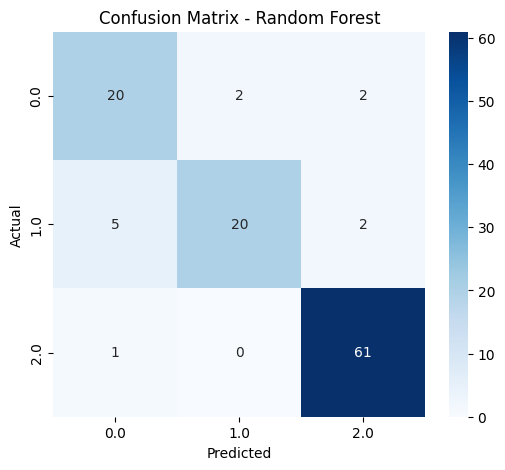

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf_nor = rf.predict(x_test)

print("\nRandom Forest results for testing phase:")
Acc_score_rf_nor = accuracy_score(y_test, y_pred_rf_nor)
print(f"Accuracy: {Acc_score_rf_nor:.4f}")
print ("#################################")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_nor))
F1_rf_nor = f1_score(y_test, y_pred_rf_nor, average='weighted')
print(f"F1 Score: {F1_rf_nor:.4f}")
print ("#################################")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_nor), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
# Accuracy , F1 for Training Phase
rf.fit(x_train, y_train)
y_pred_rf_trnor= rf.predict(x_train)

print("\nRandom Forest results for training phase:")
Acc_score_rf_trnor = accuracy_score(y_train, y_pred_rf_trnor)
print(f"Accuracy: {Acc_score_rf_trnor:.4f}")
print ("#################################")
print("Classification Report:")
print(classification_report(y_train, y_pred_rf_trnor))
F1_rf_trnor = f1_score(y_train, y_pred_rf_trnor, average='weighted')
print(f"F1 Score: {F1_rf_trnor:.4f}")


Random Forest results for training phase:
Accuracy: 0.9349
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91        53
         1.0       0.90      0.92      0.91        51
         2.0       0.95      0.95      0.95       157

    accuracy                           0.93       261
   macro avg       0.93      0.93      0.93       261
weighted avg       0.93      0.93      0.93       261

F1 Score: 0.9349


ANN Model results for testing phase:
Accuracy: 0.9027
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83        24
         1.0       0.92      0.85      0.88        27
         2.0       0.91      0.97      0.94        62

    accuracy                           0.90       113
   macro avg       0.90      0.87      0.88       113
weighted avg       0.90      0.90      0.90       113

F1 Score: 0.9012
#################################


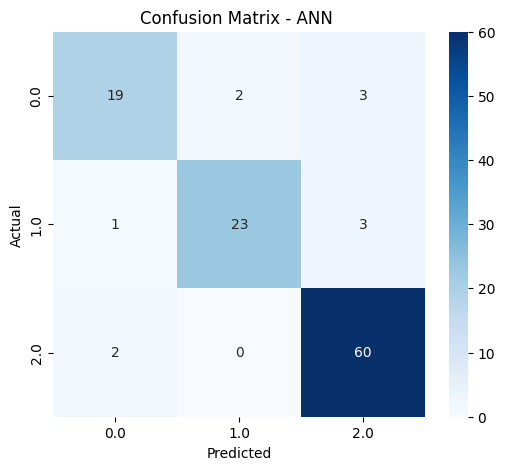

In [ ]:
#from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(32, 16, 8),activation='relu',solver='adam',
                      learning_rate_init=0.01,max_iter=120,
                      early_stopping=True,random_state=42)

model.fit(x_train, y_train)
y_pred_ann_nor = model.predict(x_test)
print("ANN Model results for testing phase:")
Acc_score_ann_nor = accuracy_score(y_test, y_pred_ann_nor)
print(f"Accuracy: {Acc_score_ann_nor:.4f}")
print("#################################")
print("Classification Report:")
print(classification_report(y_test, y_pred_ann_nor))
F1_ann_nor = f1_score(y_test, y_pred_ann_nor, average='weighted')
print(f"F1 Score: {F1_ann_nor:.4f}")
print("#################################")


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_ann_nor), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN ')
plt.show()


In [ ]:
# Training phase prediction
y_pred_ann_trnor = model.predict(x_train)

print("ANN Model results for training phase:")
Acc_score_ann_trnor = accuracy_score(y_train, y_pred_ann_trnor)
print(f"Accuracy: {Acc_score_ann_trnor:.4f}")
print("#################################")
print("Classification Report:")
print(classification_report(y_train, y_pred_ann_trnor))
F1_ann_trnor = f1_score(y_train, y_pred_ann_trnor, average='weighted')
print(f"F1 Score: {F1_ann_trnor:.4f}")
print("#################################")


ANN Model results for training phase:
Accuracy: 0.8736
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.66      0.76        53
         1.0       0.81      0.92      0.86        51
         2.0       0.89      0.93      0.91       157

    accuracy                           0.87       261
   macro avg       0.87      0.84      0.84       261
weighted avg       0.88      0.87      0.87       261

F1 Score: 0.8702
#################################


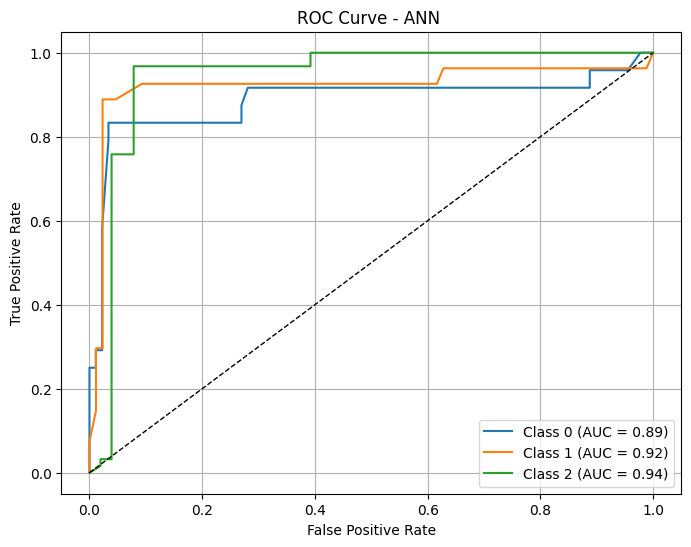

In [ ]:
# Binarize the test labels (required for multiclass ROC)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score = model.predict_proba(x_test)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN ')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


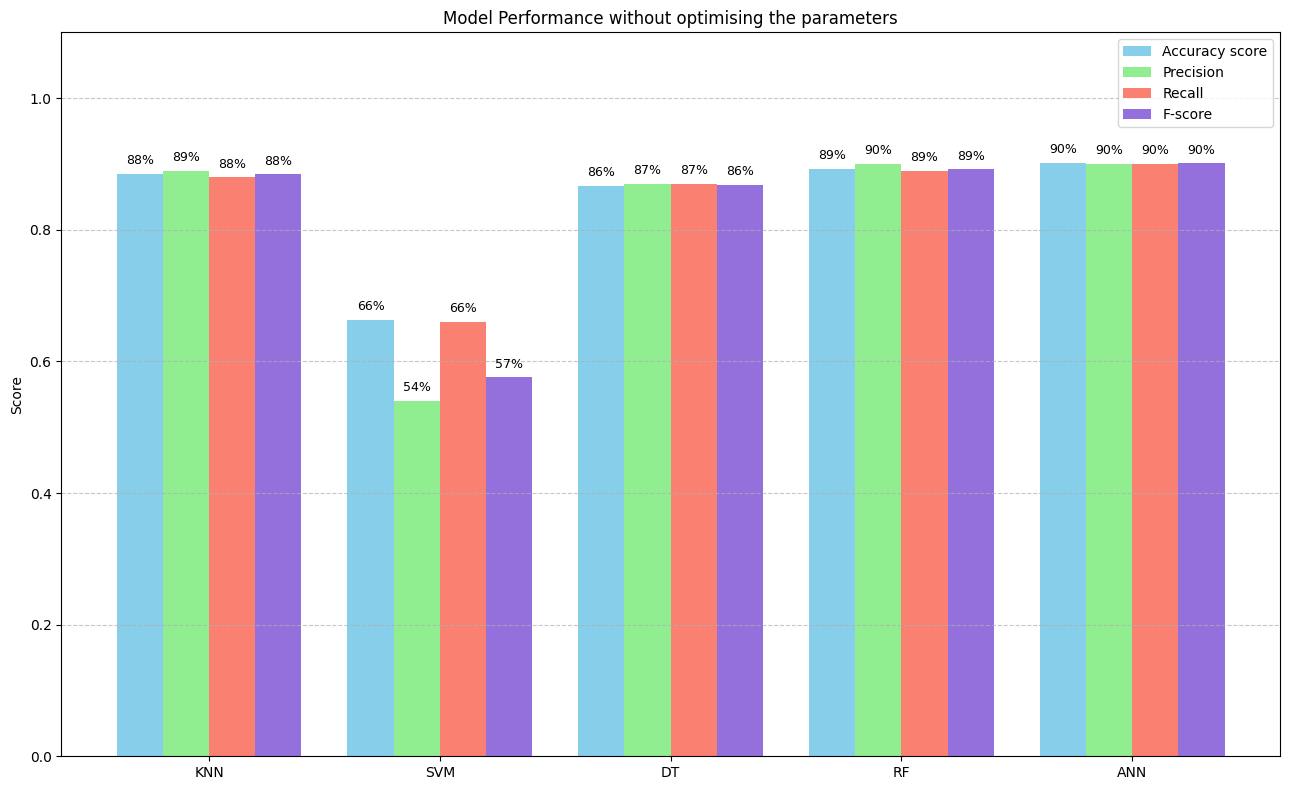

In [ ]:
models = ['KNN', 'SVM', 'DT', 'RF', 'ANN']
accuracy = [0.885, 0.663, 0.867, 0.893, 0.902]
precision = [0.89, 0.54, 0.87, 0.90, 0.90]
recall = [0.88, 0.66, 0.87, 0.89, 0.90]
f1_score = [0.884, 0.576, 0.868, 0.892, 0.901]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(13, 8))
bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy score', color='skyblue')
bars2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='lightgreen')
bars3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='salmon')
bars4 = ax.bar(x + 1.5*width, f1_score, width, label='F-score', color='mediumpurple')
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{int(height * 100)}%', ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)


ax.set_ylabel('Score')
ax.set_title('Model Performance without optimising the parameters')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
!pip install geneticalgorithm
from geneticalgorithm import geneticalgorithm as ga

In [ ]:
x = data.drop(columns=['Sleep Disorder'])
y = data['Sleep Disorder']

 The best solution found:
 [1.]

 Objective function:
 -0.854644412191582


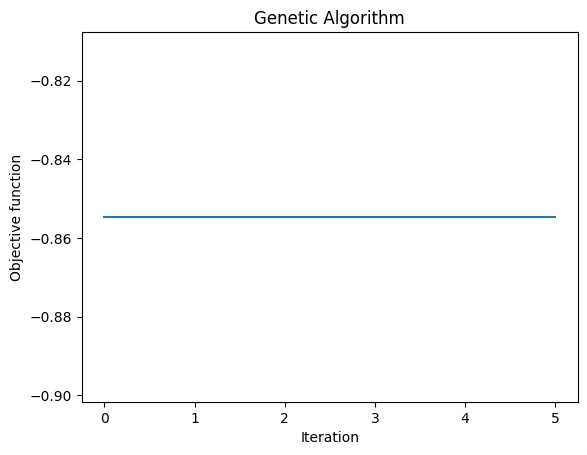


Optimized KNN Cross-validation Accuracy: 0.8546

Optimized KNN Results:
Accuracy: 0.8319
F1 Score: 0.8283
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.75        24
         1.0       0.85      0.63      0.72        27
         2.0       0.88      0.94      0.91        62

    accuracy                           0.83       113
   macro avg       0.81      0.79      0.79       113
weighted avg       0.83      0.83      0.83       113



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
from sklearn.metrics import f1_score
def fitness_function(params):
    k = int(params[0])
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    return -np.mean(scores)  # We want to maximize accuracy, so minimize negative

param_bounds = [ (1, 30) ]

algorithm_param = {
    'max_num_iteration': 5,'population_size': 12,'mutation_probability': 0.8,
    'elit_ratio': 0.2,'crossover_probability': 0.8,'parents_portion': 0.3,
    'crossover_type': 'uniform','max_iteration_without_improv': 10
}

model_ga = ga(function=fitness_function,
              dimension=1,
              variable_type='int',
              variable_boundaries=np.array(param_bounds),
              algorithm_parameters=algorithm_param)

model_ga.run()

best_k = int(model_ga.output_dict['variable'][0])
knn_opt = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_opt.fit(x_train, y_train)

optimized_cv_knn = cross_val_score(knn_opt, x_train, y_train, cv=5, scoring='accuracy').mean()
print(f"\nOptimized KNN Cross-validation Accuracy: {optimized_cv_knn:.4f}")

y_pred_knn_opt = knn_opt.predict(x_test)
Acc_score_knn_opt = accuracy_score(y_test, y_pred_knn_opt)
F1_knn_opt = f1_score(y_test, y_pred_knn_opt, average='weighted')

print("\nOptimized KNN Results:")
print(f"Accuracy: {Acc_score_knn_opt:.4f}")
print(f"F1 Score: {F1_knn_opt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn_opt))



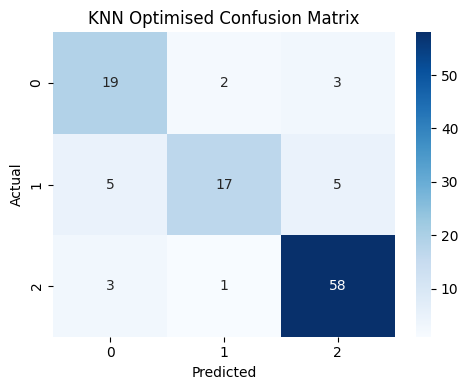

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_opt), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Optimised Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_rel

knn_baseline = KNeighborsClassifier()  # Default: n_neighbors=5
baseline_acc_knn = cross_val_score(knn_baseline, x_train, y_train, cv=5, scoring='accuracy')
print("Baseline KNN Accuracies:", baseline_acc_knn)

knn_opt = KNeighborsClassifier(n_neighbors=best_k)
optimized_acc_knn = cross_val_score(knn_opt, x_train, y_train, cv=5, scoring='accuracy')
print("Optimized KNN Accuracies:", optimized_acc_knn)

t_stat_knn, p_value_knn = ttest_rel(optimized_acc_knn, baseline_acc_knn)
print(f"\nT-statistic: {t_stat_knn:.4f}, P-value: {p_value_knn:.4f}")

if p_value_knn < 0.05:
    print("Significant improvement with GA optimization for KNN!")
else:
    print("No significant improvement found for KNN.")


Baseline KNN Accuracies: [0.79245283 0.86538462 0.90384615 0.82692308 0.86538462]
Optimized KNN Accuracies: [0.79245283 0.88461538 0.86538462 0.86538462 0.86538462]

T-statistic: 0.3015, P-value: 0.7780
No significant improvement found for KNN.



 Best SVM Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
 
 AFTER OPTIMISATION 
  Accuracy  : 0.8938
  F1 Score: 0.8909

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        24
         1.0       0.91      0.74      0.82        27
         2.0       0.91      0.98      0.95        62

    accuracy                           0.89       113
   macro avg       0.88      0.85      0.87       113
weighted avg       0.89      0.89      0.89       113



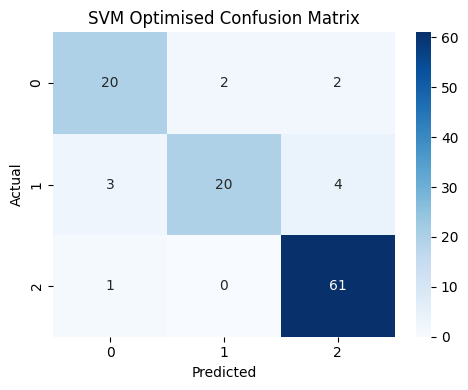

In [ ]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_svm = grid_search.best_estimator_
y_pred_svm_opt = best_svm.predict(x_test)

Acc_score_svm_opt = accuracy_score(y_test, y_pred_svm_opt)
F1_svm_opt = f1_score(y_test, y_pred_svm_opt, average='weighted')
conf_matrix_svm_opt = confusion_matrix(y_test, y_pred_svm_opt)

print("\n Best SVM Parameters:", grid_search.best_params_)
print(" \n AFTER OPTIMISATION ")
print(f"  Accuracy  : {Acc_score_svm_opt:.4f}")
print(f"  F1 Score: {F1_svm_opt:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_svm_opt))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_svm_opt, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Optimised Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
svm_baseline = SVC()
baseline_acc_svm = cross_val_score(svm_baseline, x_train, y_train, cv=5, scoring='accuracy')
print("Baseline SVM Accuracies:", baseline_acc_svm)

best_svm = grid_search.best_estimator_
optimized_acc_svm = cross_val_score(best_svm, x_train, y_train, cv=5, scoring='accuracy')
print("Optimized SVM Accuracies:", optimized_acc_svm)

t_stat_svm, p_value_svm = ttest_rel(optimized_acc_svm, baseline_acc_svm)
print(f"\nT-statistic: {t_stat_svm:.4f}, P-value: {p_value_svm:.4f}")

if p_value_svm < 0.05:
    print("Significant improvement with Grid Search optimization for SVM!")
else:
    print("No significant improvement found for SVM.")


Baseline SVM Accuracies: [0.67924528 0.65384615 0.59615385 0.61538462 0.65384615]
Optimized SVM Accuracies: [0.8490566  0.90384615 0.96153846 0.84615385 0.92307692]

T-statistic: 8.0808, P-value: 0.0013
Significant improvement with Grid Search optimization for SVM!


 The best solution found:
 [5. 4.]

 Objective function:
 -0.893033381712627


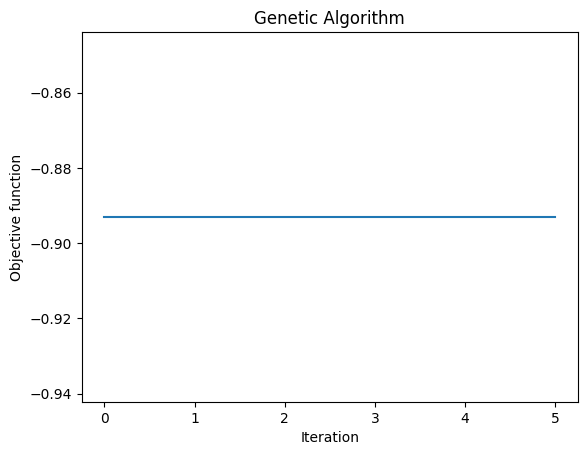


 Optimized DT accuracy: 0.8930

Optimized Decision Tree Results :
Accuracy: 0.8850
F1 Score: 0.8840
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82        24
         1.0       0.87      0.74      0.80        27
         2.0       0.94      0.95      0.94        62

    accuracy                           0.88       113
   macro avg       0.86      0.86      0.86       113
weighted avg       0.89      0.88      0.88       113



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
def fitness_function(params):
    max_depth = int(params[0])
    min_samples_split = int(params[1])

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    return -np.mean(scores)

param_bounds = [(1, 15),   # max_depth
                (2, 15)    # min_samples_split
                ]

algorithm_param = {'max_num_iteration': 5,'population_size': 12,'mutation_probability': 0.8,
                   'elit_ratio': 0.2,'crossover_probability': 0.8,'parents_portion': 0.3,
                   'crossover_type': 'uniform','max_iteration_without_improv': 10 }


model_ga = ga(function=fitness_function,dimension=2,variable_type='int',
              variable_boundaries=np.array(param_bounds),
              algorithm_parameters=algorithm_param)

model_ga.run()

#Extract optimized parameters
best_params = model_ga.output_dict['variable']
max_depth_opt, min_samples_split_opt = map(int, best_params)

dt_opt = DecisionTreeClassifier(max_depth=max_depth_opt, min_samples_split=min_samples_split_opt, random_state=42)
dt_opt.fit(x_train, y_train)

optimized_cv_dt = cross_val_score(dt_opt, x_train, y_train, cv=5, scoring='accuracy').mean()
print(f"\n Optimized DT accuracy: {optimized_cv_dt:.4f}")

y_pred_dt_opt = dt_opt.predict(x_test)
Acc_score_dt_opt = accuracy_score(y_test, y_pred_dt_opt)
F1_dt_opt = f1_score(y_test, y_pred_dt_opt, average='weighted')

print("\nOptimized Decision Tree Results :")
print(f"Accuracy: {Acc_score_dt_opt:.4f}")
print(f"F1 Score: {F1_dt_opt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_opt))


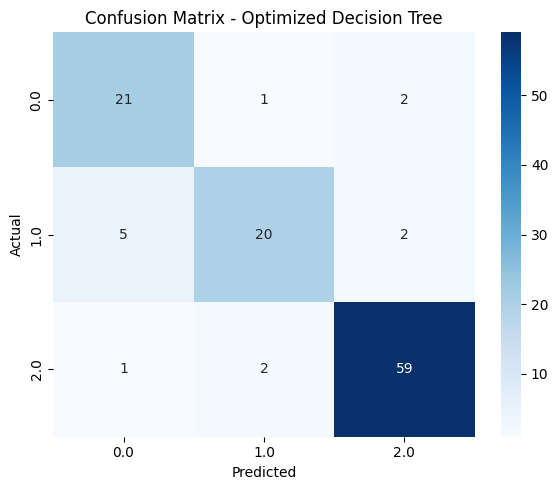

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_opt), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized Decision Tree')
plt.tight_layout()
plt.show()

In [ ]:
dt_baseline = DecisionTreeClassifier(random_state=42)
base_acc_dt = cross_val_score(dt_baseline, x_train, y_train, cv=5, scoring='accuracy')
print("Baseline DT Accuracies:", base_acc_dt)

# Optimized DT
dt_opt = DecisionTreeClassifier(max_depth=max_depth_opt, min_samples_split=min_samples_split_opt, random_state=42)
optimized_acc_dt = cross_val_score(dt_opt, x_train, y_train, cv=5, scoring='accuracy')
print("Optimized DT Accuracies:", optimized_acc_dt)

# Paired T-Test
t_stat_dt, p_value_dt = ttest_rel(optimized_acc_dt, base_acc_dt)
print(f"\nT-statistic: {t_stat_dt:.4f}, P-value: {p_value_dt:.4f}")

if p_value_dt < 0.05:
    print("Significant improvement with GA optimization for DT!")
else:
    print("No significant improvement found for DT.")


Baseline DT Accuracies: [0.81132075 0.84615385 0.94230769 0.90384615 0.88461538]
Optimized DT Accuracies: [0.81132075 0.88461538 0.94230769 0.90384615 0.92307692]

T-statistic: 1.6330, P-value: 0.1778
No significant improvement found for DT.



Baseline RF cross-validation accuracy: 0.9121
Baseline Test Accuracy: 0.8938
 The best solution found:
 [ 6.  4. 43.]

 Objective function:
 -0.9159651669085631


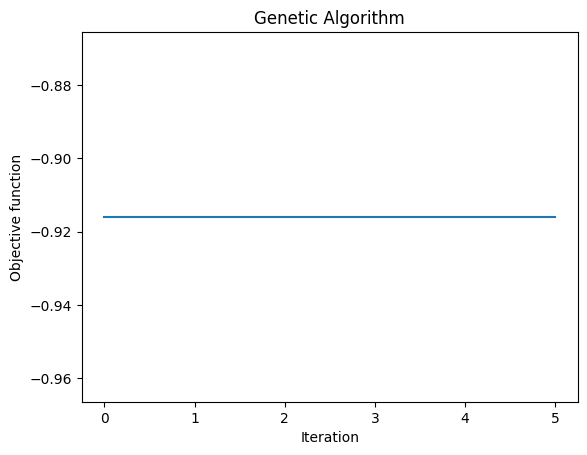


 Optimized RF cross-validation accuracy: 0.9160

Optimized Random Forest results for testing phase:
Accuracy: 0.8938
#################################
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80        24
         1.0       0.91      0.74      0.82        27
         2.0       0.94      0.98      0.96        62

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113

F1 Score: 0.8920
#################################


In [ ]:
#RF WITH GA
from sklearn.metrics import f1_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline.fit(x_train, y_train)
baseline_cv = cross_val_score(rf_baseline, x_train, y_train, cv=5, scoring='accuracy').mean()
print(f"\nBaseline RF cross-validation accuracy: {baseline_cv:.4f}")
print(f"Baseline Test Accuracy: {Acc_score_rf_nor:.4f}")

def fitness_function(params):
    max_depth = int(params[0])
    min_samples_split = int(params[1])
    n_estimators = int(params[2])
    model = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state=42)
    # Use cross-validation accuracy as fitness score
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    return -np.mean(scores)  # Minimize negative accuracy

param_bounds = [(5, 15),   # max_depth
                (2, 10),   # min_samples_split
                (5, 70)    # n_estimators
               ]


algorithm_param = {'max_num_iteration':5,'population_size': 12,'mutation_probability': 0.8,'elit_ratio': 0.2,
    'crossover_probability': 0.8,'parents_portion': 0.3,'crossover_type': 'uniform','max_iteration_without_improv': 10}

ga_model = ga(function=fitness_function, dimension=3, variable_type='int',
              variable_boundaries=np.array(param_bounds), algorithm_parameters=algorithm_param)
ga_model.run()

best_params = ga_model.output_dict['variable']
max_depth_opt, min_samples_split_opt, n_estimators_opt = map(int, best_params)


rf_opt = RandomForestClassifier(max_depth=max_depth_opt, min_samples_split=min_samples_split_opt,
                                n_estimators=n_estimators_opt, random_state=42)
rf_opt.fit(x_train, y_train)

optimized_cv = cross_val_score(rf_opt, x_train, y_train, cv=5, scoring='accuracy').mean()
print(f"\n Optimized RF cross-validation accuracy: {optimized_cv:.4f}")


y_pred_rf_opt = rf_opt.predict(x_test)
Acc_score_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
print("\nOptimized Random Forest results for testing phase:")
print(f"Accuracy: {Acc_score_rf_opt:.4f}")
print("#################################")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_opt))
F1_rf_opt = f1_score(y_test, y_pred_rf_opt, average='weighted')
print(f"F1 Score: {F1_rf_opt:.4f}")
print("#################################")


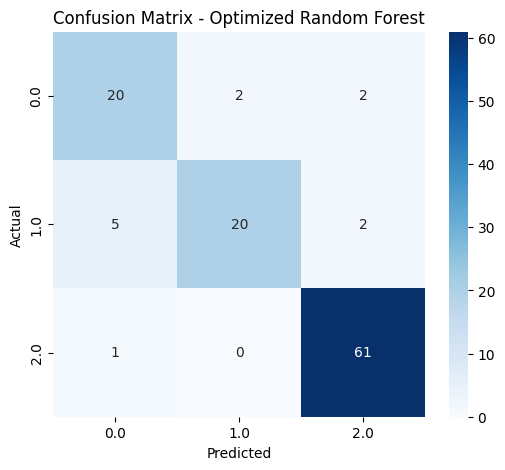

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_opt), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.show()


In [ ]:
from scipy.stats import ttest_rel
# === Baseline RF ===
rf_baseline = RandomForestClassifier(n_estimators=30, random_state=42)
base_acc = cross_val_score(rf_baseline, x_train, y_train, cv=5, scoring='accuracy')
print("Baseline RF Accuracies:", base_acc)

# === Optimized RF ===
rf_opt = RandomForestClassifier(n_estimators=n_estimators_opt, max_depth=max_depth_opt,
                                min_samples_split=min_samples_split_opt, random_state=42)
optimized_acc = cross_val_score(rf_opt, x_train, y_train, cv=5, scoring='accuracy')
print("Optimized RF Accuracies:", optimized_acc)

# === Paired T-Test ===
t_stat, p_value = ttest_rel(optimized_acc, base_acc)
print(f"\n T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print(" Significant improvement with GA optimization!")
else:
    print(" No Significant improvement found.")


Baseline RF Accuracies: [0.8490566  0.88461538 0.98076923 0.88461538 0.90384615]
Optimized RF Accuracies: [0.86792453 0.90384615 0.98076923 0.92307692 0.92307692]

 T-statistic: 3.1501, P-value: 0.0345
 Significant improvement with GA optimization!


In [ ]:
best_solution = ga_model.output_dict['variable']
print(best_solution)


[10.  9. 34.]


 The best solution found:
 [2.60395551e+00 3.65938143e+01 2.40713056e-03]

 Objective function:
 -0.9197387518142236


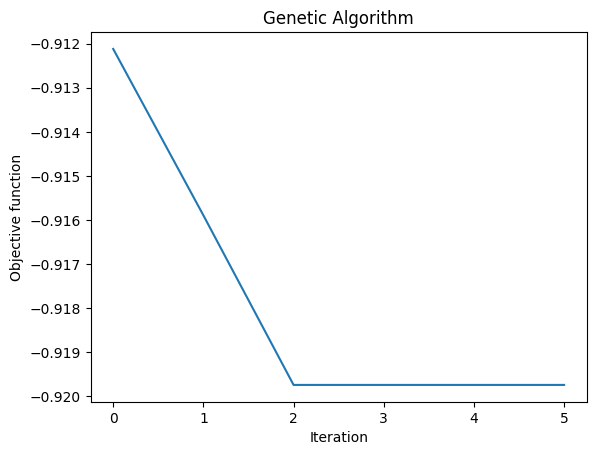


Optimized ANN Cross-Validation Accuracy (from GA): 0.9197

Optimized ANN Results:
Accuracy: 0.9115
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        24
         1.0       0.92      0.81      0.86        27
         2.0       0.94      0.98      0.96        62

    accuracy                           0.91       113
   macro avg       0.90      0.88      0.89       113
weighted avg       0.91      0.91      0.91       113

F1 Score: 0.9102


In [ ]:
#ANN
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

def fitness_function(params):
    num_hidden_layers = int(params[0])
    num_units_per_layer = int(params[1])
    learning_rate_init = params[2]
    hidden_layer_sizes = tuple([num_units_per_layer] * num_hidden_layers)

    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                          learning_rate_init=learning_rate_init,
                          max_iter=120,
                          random_state=42)
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    return -np.mean(scores)

param_bounds = [(1, 4), (10, 50), (0.0001, 0.01)]
algorithm_param = {'max_num_iteration': 5,'population_size': 12,'mutation_probability': 0.8,'elit_ratio': 0.2,
    'crossover_probability': 0.8,'parents_portion': 0.3,'crossover_type': 'uniform','max_iteration_without_improv': 10}

ga_model = ga(function=fitness_function,
              dimension=3,
              variable_type='real',
              variable_boundaries=np.array(param_bounds),
              algorithm_parameters=algorithm_param)
ga_model.run()

optimized_cv_accuracy = -ga_model.output_dict['function']
print(f"\nOptimized ANN Cross-Validation Accuracy (from GA): {optimized_cv_accuracy:.4f}")

best_params = ga_model.output_dict['variable']
num_hidden_layers_opt, units_per_layer_opt = int(best_params[0]), int(best_params[1])
learning_rate_init_opt = best_params[2]
hidden_layer_sizes_opt = tuple([units_per_layer_opt] * num_hidden_layers_opt)

ann_opt = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_opt,
                        learning_rate_init=learning_rate_init_opt,
                        max_iter=120,
                        random_state=42)
ann_opt.fit(x_train, y_train)
y_pred_ann_opt = ann_opt.predict(x_test)

print("\nOptimized ANN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann_opt):.4f}")
print(classification_report(y_test, y_pred_ann_opt))
print(f"F1 Score: {f1_score(y_test, y_pred_ann_opt, average='weighted'):.4f}")


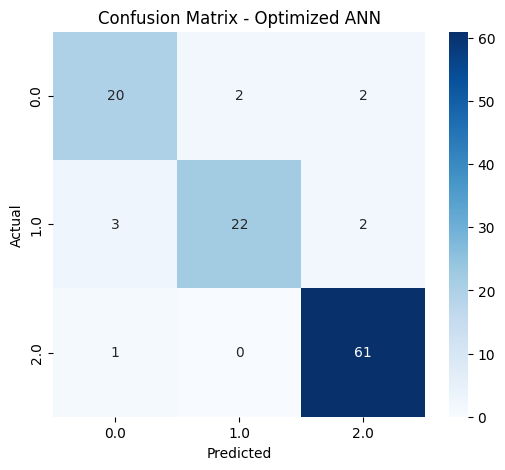

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_ann_opt), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized ANN')
plt.show()

In [ ]:
print(" Best GA-found parameters:")
print(f"Number of hidden layers: {num_hidden_layers_opt}")
print(f"Units per layer: {units_per_layer_opt}")
print(f"Learning rate: {learning_rate_init_opt:.6f}")


 Best GA-found parameters:
Number of hidden layers: 2
Units per layer: 36
Learning rate: 0.002407


In [ ]:
from scipy.stats import ttest_rel

# ==== Baseline ANN ====
ann_baseline = MLPClassifier(hidden_layer_sizes=(32, 16, 8), learning_rate_init=0.01,
                             max_iter=5,random_state=42)
baseline_acc = cross_val_score(ann_baseline, x_train, y_train, cv=5, scoring='accuracy')
print("Baseline ANN CV Accuracies:", baseline_acc)

# ==== Optimized ANN ====
ann_opt = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_opt,
                        learning_rate_init=learning_rate_init_opt,
                        max_iter=120,
                        random_state=42)
optimized_acc = cross_val_score(ann_opt, x_train, y_train, cv=5, scoring='accuracy')
print("Optimized ANN CV Accuracies:", optimized_acc)

# ==== Paired T-Test ====
t_stat, p_value = ttest_rel(optimized_acc, baseline_acc)
print(f"\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print(" Significant improvement with GA optimization!")
else:
    print(" No  significant improvement found.")


Baseline ANN CV Accuracies: [0.73584906 0.73076923 0.90384615 0.78846154 0.69230769]
Optimized ANN CV Accuracies: [0.86792453 0.90384615 0.98076923 0.92307692 0.92307692]

T-statistic: 5.8742, P-value: 0.0042
 Significant improvement with GA optimization!


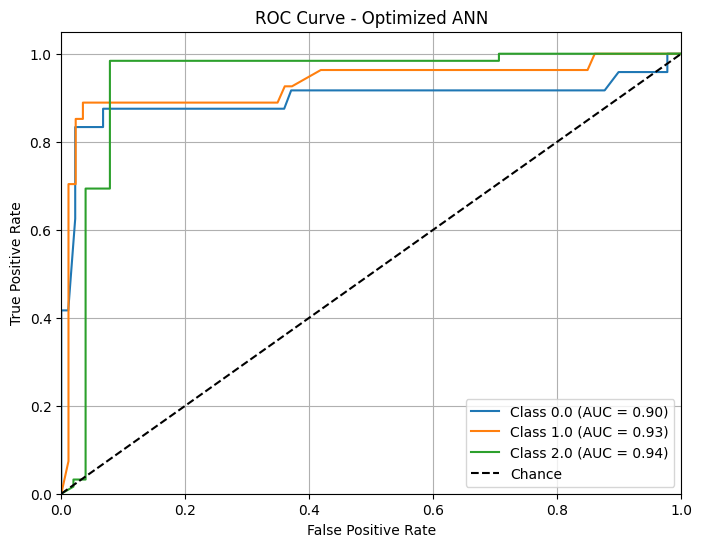

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the output (for multiclass ROC)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

ann_opt.fit(x_train, y_train)
y_score = ann_opt.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized ANN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

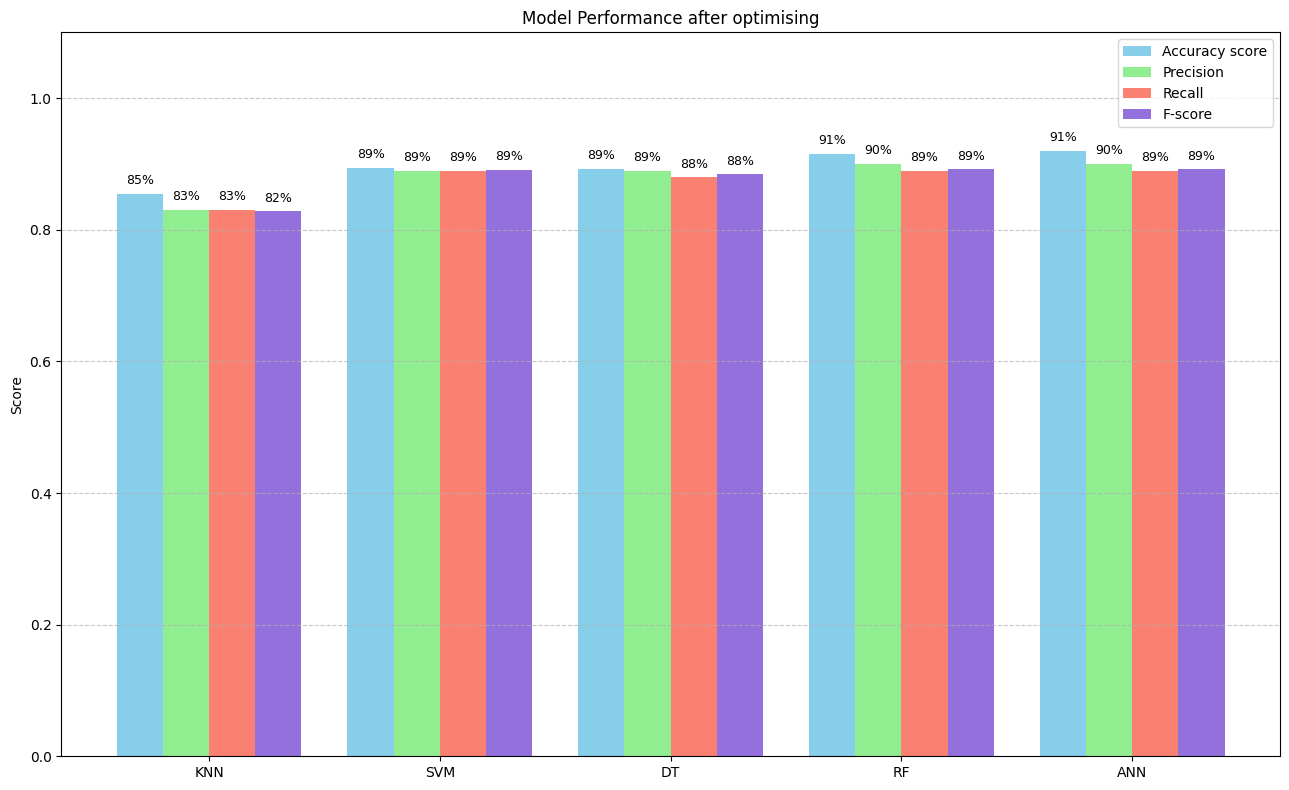

In [ ]:
models = ['KNN', 'SVM', 'DT', 'RF', 'ANN']
accuracy = [0.8546, 0.8938, 0.893, 0.9157, 0.9197]
precision = [0.83, 0.89, 0.89, 0.90, 0.90]
recall = [0.83, 0.89, 0.88, 0.89, 0.89]
f1_score = [0.828, 0.8909, 0.884, 0.892, 0.892]

x = np.arange(len(models))
width = 0.2
fig, ax = plt.subplots(figsize=(13, 8))

bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy score', color='skyblue')
bars2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='lightgreen')
bars3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='salmon')
bars4 = ax.bar(x + 1.5*width, f1_score, width, label='F-score', color='mediumpurple')


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{int(height * 100)}%', ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)


ax.set_ylabel('Score')
ax.set_title('Model Performance after optimising')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
